# Polynomial Regression

## Normalization (Standardisation)

You are given 20 samples with the following values for a feature x:

In [9]:
import numpy as np

x1 = np.array([56.73040025,  42.07755103,  83.46673661, 167.79511467,
       128.41593193, 1620.39079195,  67.57569387, 124.50199413,
        91.58831309, 241.75090834,  93.69791353,  80.43787513,
        20.38769615, 171.08315486,  59.2372586 ,  15.73475339,
       122.8934116 ,  27.26541632, 217.80864704, 150.23539618])

x2 = np.array([ 0.11179419,  0.22728357, -0.08936106,  0.59369292,  0.36202046,
        0.66546626, -0.1019957 ,  0.63595947, -0.10978375,  0.68933564,
        0.05552168,  0.5122346 ,  0.04727783, -8.53652367,  0.60681752,
        0.66415377,  0.68607407,  0.15515183, -0.16490555,  0.77765625])

Note that the ranges of these two features look very different

In [12]:
print('Original range for feature 1: [{0}, {1}]'.format(x1.min(), x1.max()))
print('Original range for feature 2: [{0}, {1}]'.format(x2.min(), x2.max()))

Original range for feature 1: [15.73475339, 1620.39079195]
Original range for feature 2: [-8.53652367, 0.77765625]


<br>
First of all lets plot them along one dimension, to see what their distribution looks like. To do this, we will do a scatter plot, but will set all Y coordinates to zero.

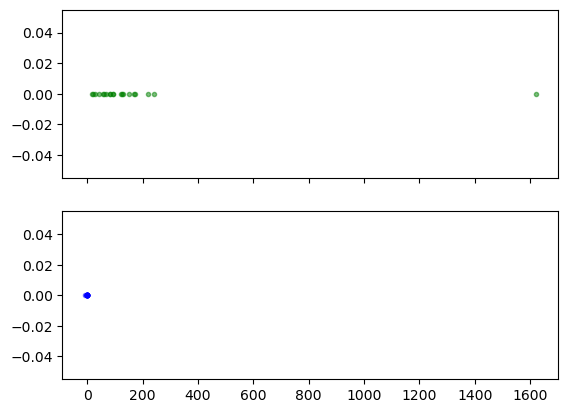

In [15]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1, np.zeros_like(x1), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2, np.zeros_like(x2), color = 'b', marker ='.', alpha=0.5)

The two features are in very different ranges, while it seems that there is one value which is quite off on the right on the top plot. This is probably an *outlier*, an error in measurement for example.

New range for feature 1: [0.0, 1.0]
New range for feature 2: [0.0, 1.0]


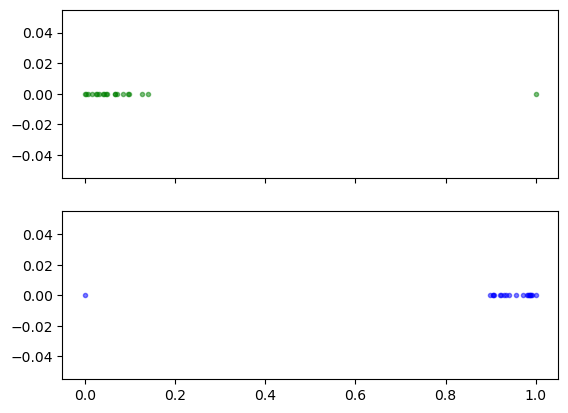

In [19]:
x1_norm = (x1 - x1.min()) / (x1.max()-x1.min())
x2_norm = (x2 - x2.min()) / (x2.max()-x2.min())

print('New range for feature 1: [{0}, {1}]'.format(x1_norm.min(), x1_norm.max()))
print('New range for feature 2: [{0}, {1}]'.format(x2_norm.min(), x2_norm.max()))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1_norm, np.zeros_like(x1_norm), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2_norm, np.zeros_like(x2_norm), color = 'b', marker ='.', alpha=0.5)

---

*Answer*

We are not taking good advantage of the range between $[0, 1]$ in which we have normalised... all our data seem to be compressed in a small range betwen $[0, 0.2]$. This is caused by the outliers. By the way, we seem to have an outlier also in the second feature. If we remove the outliers and do the same, our data would expand to cover the whole range of $[0, 1]$.

---


Now I'll normalize the data and divide by the standard deviation. We will then graph the normalized data.

New range for feature 1: [-0.4859493180896712, 4.285720645276414]
New range for feature 2: [-4.301740402698035, 0.45349077190434217]


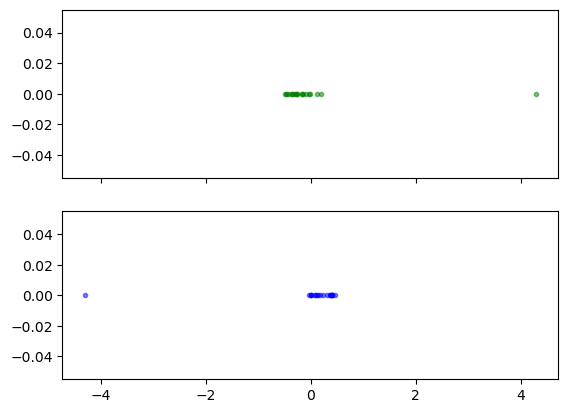

In [27]:
x1_norm = (x1 - x1.mean()) / x1.std()
x2_norm = (x2 - x2.mean()) / x2.std()

print('New range for feature 1: [{0}, {1}]'.format(x1_norm.min(), x1_norm.max()))
print('New range for feature 2: [{0}, {1}]'.format(x2_norm.min(), x2_norm.max()))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1_norm, np.zeros_like(x1_norm), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2_norm, np.zeros_like(x2_norm), color = 'b', marker ='.', alpha=0.5)

---

*Interpretation*

The bulk of our data now is well distributed in a small region around zero. Most importantly, the two distributions now, apart from the outliers, overlap (are more or less in the same range).

If we removed the outlier, our data would still remain around the same range. So in this case, the outlier does not affect a lot how the rest of the data is normalised.

---


We now want to remove any outliers. We will consider anything above 1000 in feature 1 or anything below -5 in feature 2 as an outlier.

[ True  True  True  True  True False  True  True  True  True  True  True
  True False  True  True  True  True  True  True]
New range for feature 1: [-1.3394144956191574, 2.273165947983178]
New range for feature 2: [-1.4820988372774357, 1.4325634981142716]


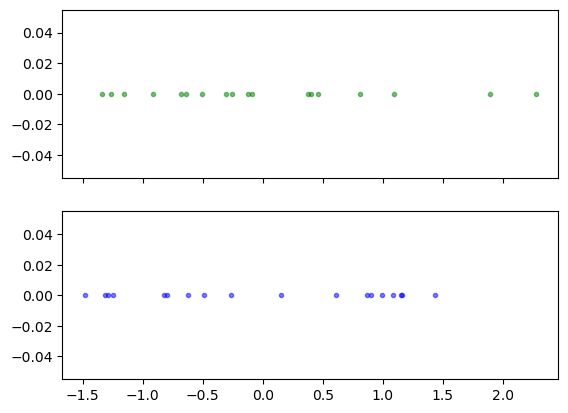

In [31]:
mask = (x1 < 1000) & (x2 > -5)
print(mask)

x1_new = x1[mask]
x2_new = x2[mask]


x1_norm = (x1_new - x1_new.mean()) / x1_new.std()
x2_norm = (x2_new - x2_new.mean()) / x2_new.std()

print('New range for feature 1: [{0}, {1}]'.format(x1_norm.min(), x1_norm.max()))
print('New range for feature 2: [{0}, {1}]'.format(x2_norm.min(), x2_norm.max()))

f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)

ax1.scatter(x1_norm, np.zeros_like(x1_norm), color = 'g', marker ='.', alpha=0.5)
ax2.scatter(x2_norm, np.zeros_like(x2_norm), color = 'b', marker ='.', alpha=0.5)

## Multiple Linear Regression with Normalisation

Let's revisit the problem of house prices that we saw last week. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price of each sample.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 
 
For simplification we are going to use only one feature for the time being - the size of the house.

In [35]:
size = np.array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

rooms = np.array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

price = np.array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

The gradient descent function we used last time is the following. We have done a small modification to store and return the cost in every iteration, so that we can then plot the evolution of the cost during the optimisation (training) process.

0.08050805332714407
163.9249033496211


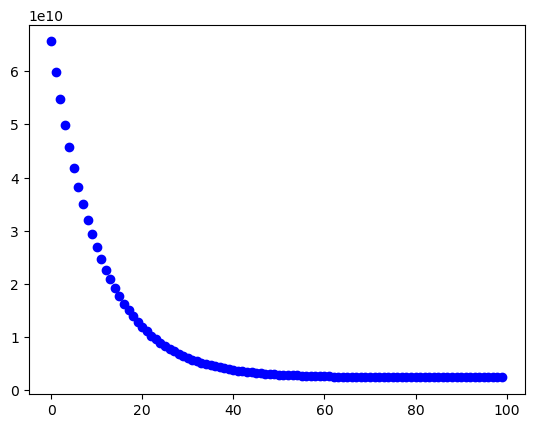

In [38]:
def GradientDescent(x, y, max_iterations=100, alpha=1):
    m = len(x)
    J = np.zeros(max_iterations)
   
    w0 = 0
    w1 = 0
    
    for it in range(max_iterations):
        s0 = 0 
        s1 = 0
        for i in range(m):
            h = w0 + w1 * x[i]
            s0 = s0 + (h - y[i])
            s1 = s1 + (h - y[i])* x[i]
            J[it] = J[it]+(h - y[i])**2
        Grad0 = s0 / m 
        Grad1 = s1 / m 
        J[it] /= 2*m
        
        w0 = w0 - alpha * Grad0
        w1 = w1 - alpha * Grad1
        
    return [w0, w1, J]
    
[w0, w1, J] = GradientDescent(size, price, alpha=0.00000001)

print(w0)
print(w1)
plt.plot(np.arange(len(J)), J, 'bo')

---

*Interpretation*

The second parameter ($w_1$) converges to the same value every time, while the first parameter ($w_0$) does not move away from the initial value. It seems like the learning rate works for $w_1$ but it's too small for $w_0$.

---


Now I'll normalise the data and do the gradient descent again. 

340403.61773803073
105761.32424947785


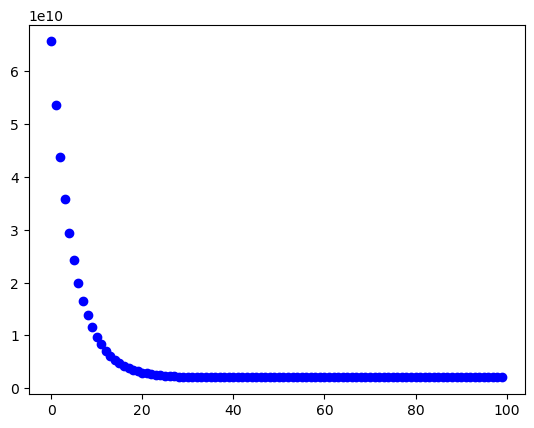

In [43]:
size_normalised = (size-size.mean())/size.std()

[w0, w1, J] = GradientDescent(size_normalised, price, max_iterations=100, alpha=0.1)

print(w0)
print(w1)
plt.plot(np.arange(len(J)), J, 'bo')

---

*Interpretation*

The learning rate does not need to be so small anymore. We can now find a "reasonable" value for learning rate that works.

The starting point of $w_0$ is not so important anymore, the learning rate works for both parameters.

The parameter values we obtain are very different than before (much larger)

---

Now we use the model calculated to predict the price of a house with `size = 3200` square feet.

Estimated price for a house size of 3200 =  501738.08593407413


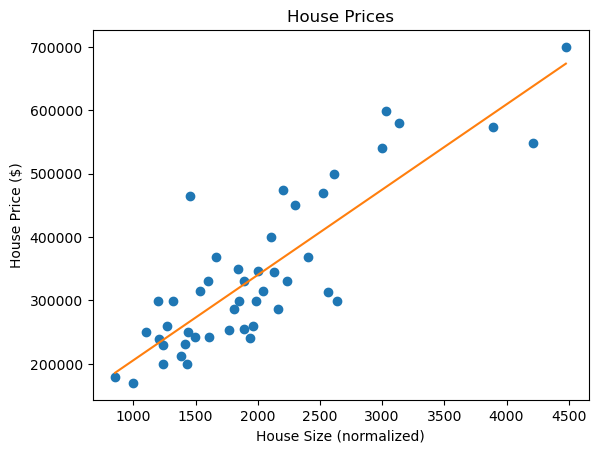

In [47]:
value_normalised = (3200 - size.mean()) / size.std()

est_price = w0 + w1*value_normalised
print('Estimated price for a house size of 3200 = ', est_price)

plt.plot(size, price,'o')
plt.title('House Prices')
plt.xlabel('House Size (normalized)')
plt.ylabel('House Price ($)')

xx = range(int(min(size)),int(max(size)))
yy = [w0 + w1 * (x-size.mean())/size.std() for x in xx]
plt.plot(xx,yy)

## Vectorising the code

Now let's rewrite our Gradient Descent function in a slightly more efficient form, using numpy, so that it can take as input a variable number of features. X in this case will be the design matrix of size $(samples \times (features + 1) )$ and Y will be a vector of the true outputs of size $(samples \times 1)$

In [64]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m, n = X.shape 
    J = np.zeros(max_iterations)

    y = y.reshape(m, 1)
    
    w = np.zeros(shape=(n, 1))
    
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,w) - y)) / m;
        w = w - alpha*grad
        J[iteration] = sum((np.dot(X, w) - y) ** 2).item()

    return [w, J]

Let's use the new version of Gradient Descent to calculate the parameter values 

In [67]:
size = size.reshape(-1, 1) 
ones = np.ones_like(size)

X = np.hstack( (ones, size ) )

print(X[0:4, :])

mu = X.mean(axis = 0) 
sigma = X.std(axis = 0, ddof=1)

X[:,1] = (X[:,1] - mu[1]) / sigma[1];

print(X[0:4, :])

[[1.000e+00 2.104e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 2.400e+03]
 [1.000e+00 1.416e+03]]
[[ 1.          0.13000987]
 [ 1.         -0.50418984]
 [ 1.          0.50247636]
 [ 1.         -0.73572306]]


w result:  [[340403.61773803]
 [106903.9668554 ]]


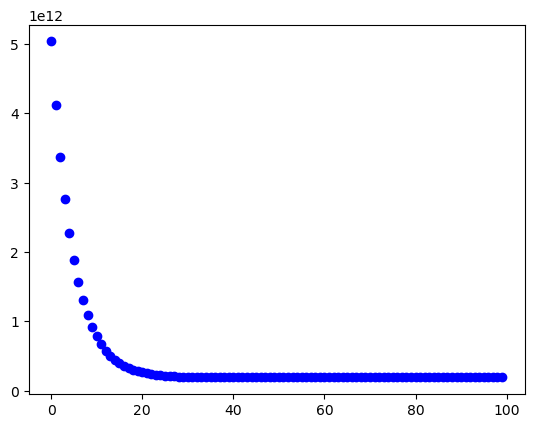

In [69]:
[w, J] = GradientDescent_np(X, price, alpha=0.1)
print('w result: ', w)

plt.plot(np.arange(len(J)), J, 'bo')

Now I'll do the same, but this time using the rooms feature as well

[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]]
[[ 1.          0.13000987 -0.22367519]
 [ 1.         -0.50418984 -0.22367519]
 [ 1.          0.50247636 -0.22367519]
 [ 1.         -0.73572306 -1.53776691]]
w result:  [[340403.61773803]
 [109912.67848878]
 [ -5931.10911548]]


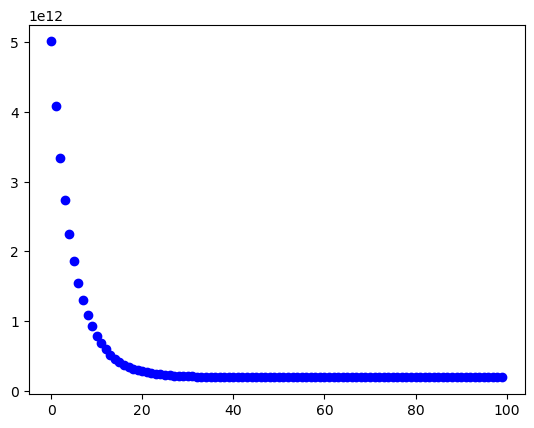

In [72]:
size = size.reshape(-1, 1) 
rooms = rooms.reshape(-1, 1) 
ones = np.ones_like(size)

X = np.hstack( (ones, size, rooms ) )

print(X[0:4, :])


mu = X.mean(axis = 0)
sigma = X.std(axis = 0, ddof=1) 

X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = (X[:,2] - mu[2]) / sigma[2];

print(X[0:4, :])

[w, J] = GradientDescent_np(X, price, alpha=0.1)
print('w result: ', w)

plt.plot(np.arange(len(J)), J, 'bo')

## Polynomial Regression

Suppose you are given the following samples for a problem

In [76]:
feat = np.array([3.70559436, 2.11187022, 2.13226786, 3.17189934, 2.61453101,
       2.07442989, 0.0071344 , 0.46131173, 3.54697197, 2.62172798,
       3.48080232, 4.77734162, 3.41456927, 0.26564345, 1.54426342,
       2.96297344, 1.17560204, 4.824855  , 4.72524112, 4.2420044 ,
       2.36161998, 4.20738357, 0.65555321, 1.54366829, 2.31498197,
       3.709236  , 2.42912614, 0.68438059, 1.71768265, 1.62213085,
       1.50209452, 0.827507  , 2.07450886, 2.24060329, 3.87450188,
       3.9819535 , 2.61195064, 2.30315148, 3.89106801, 4.43644476,
       3.37459385, 4.00239524, 4.69555677, 0.20327905, 4.37835862,
       1.38281536, 2.3788225 , 3.98380478, 3.58621116, 0.73573786])

out = np.array([30.96263192, 18.1353074 , 19.01322047, 27.51746967, 21.5564388 ,
       20.36902552,  8.62646886, 11.9312829 , 30.24023043, 21.01022706,
       26.68362214, 42.44017786, 27.8180402 , 11.75634874, 15.85208479,
       25.40096482, 12.55474498, 42.58028011, 41.31397814, 35.26195553,
       20.57609693, 36.59827885, 12.12148611, 15.50647546, 19.47160702,
       30.39893467, 20.22817055, 11.57297398, 15.01927645, 16.63212174,
       15.74075133, 12.82740801, 17.47207096, 19.72061313, 34.11748197,
       34.68450945, 21.4326298 , 19.34466379, 32.74301104, 40.46357452,
       28.37694081, 32.96050834, 41.22708261, 11.37357581, 36.19880559,
       16.2084813 , 20.18300514, 34.13550541, 31.02619715, 11.07680732])

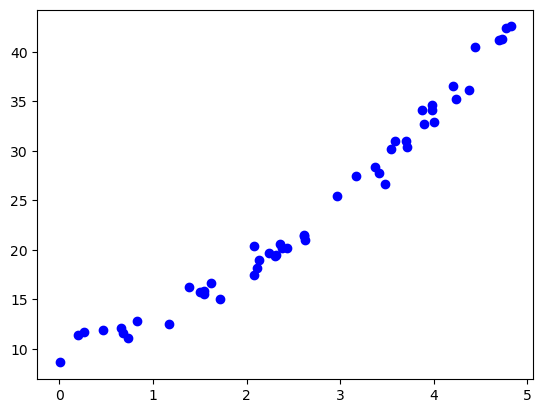

In [78]:
plt.plot(feat, out, 'bo')

I'll use our gradient descent function to fit a linear model to this data. 

w result:  [[24.00863319]
 [ 9.62206171]]
Final cost:  208.93875334031785


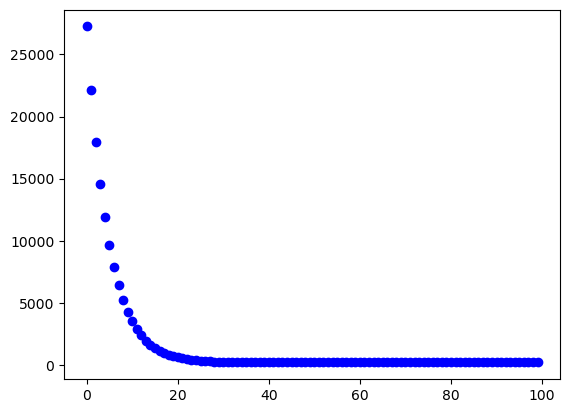

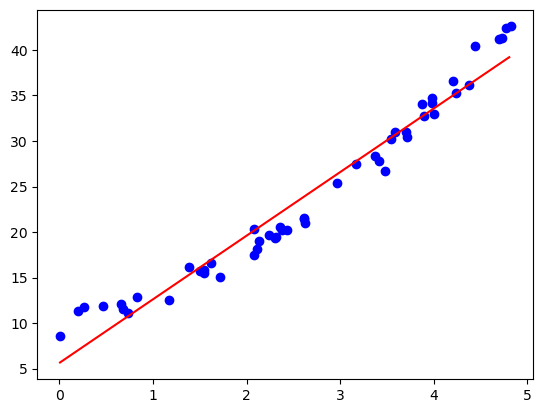

In [83]:
feat = feat.reshape(-1, 1) 
ones = np.ones_like(feat) 

X = np.hstack( (ones, feat) )

mu = X.mean(axis = 0)
sigma = X.std(axis = 0, ddof=1) 

X[:,1] = (X[:,1] - mu[1]) / sigma[1];

[w, J] = GradientDescent_np(X, out, alpha=0.1)
print('w result: ', w)

plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(np.min(feat), np.max(feat), 0.1)
yy = [w[0] + w[1] * (x-mu[1])/sigma[1] for x in xx]
plt.plot(xx, yy, 'r')

Now I'll use the gradient descent function to fit a 2-degree polynomial model to the same data. 

w result:  [[24.00863319]
 [ 4.28153749]
 [ 5.57672315]]
Final cost:  52.0997111508815


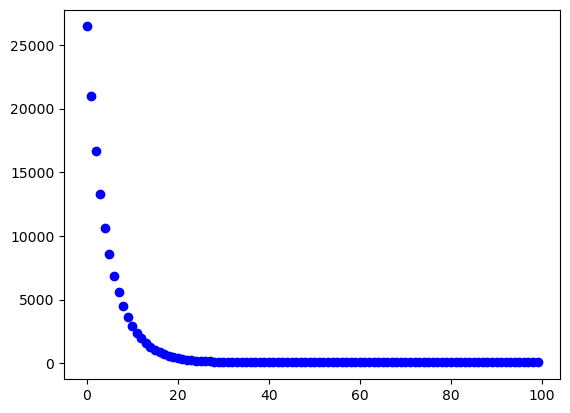

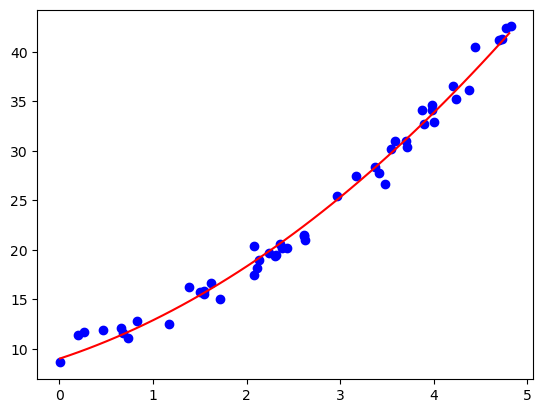

In [88]:
feat = feat.reshape(-1, 1) 
feat2 = feat ** 2
ones = np.ones_like(feat) 

X = np.hstack( (ones, feat, feat2) )

mu = X.mean(axis = 0) 
sigma = X.std(axis = 0, ddof=1) 

X[:,1] = (X[:,1] - mu[1]) / sigma[1];
X[:,2] = (X[:,2] - mu[2]) / sigma[2];

[w, J] = GradientDescent_np(X, out, alpha=0.1)
print('w result: ', w)

plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

plt.figure()
plt.plot(feat, out, 'bo')
xx = np.arange(np.min(feat), np.max(feat), 0.1)

yy = [w[0] + w[1] * (x-mu[1])/sigma[1] + w[2] * (x**2-mu[2])/sigma[2] for x in xx]

plt.plot(xx, yy, 'r')